In [7]:
#!wget -nc https://archive.org/download/google-news-vectors-negative-300.bin_202311/GoogleNews-vectors-negative300.bin.gz

--2024-02-20 16:55:13--  https://archive.org/download/google-news-vectors-negative-300.bin_202311/GoogleNews-vectors-negative300.bin.gz
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801203.us.archive.org/18/items/google-news-vectors-negative-300.bin_202311/GoogleNews-vectors-negative300.bin.gz [following]
--2024-02-20 16:55:14--  https://ia801203.us.archive.org/18/items/google-news-vectors-negative-300.bin_202311/GoogleNews-vectors-negative300.bin.gz
Resolving ia801203.us.archive.org (ia801203.us.archive.org)... 207.241.228.23
Connecting to ia801203.us.archive.org (ia801203.us.archive.org)|207.241.228.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1,5G) [application/octet-stream]
Saving to: 'GoogleNews-vectors-negative300.bin.gz'

     0K .......... .......... .......... .......... ..........  0% 

In [1]:
from gensim.models import KeyedVectors

In [2]:
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True)

In [3]:
def find_analogies(w1, w2, w3):
  # w1 - w2 = ? - w3
  # e.g. king - man = ? - woman
  #      ? = +king +woman -man
  r = word_vectors.most_similar(positive=[w1, w3], negative=[w2])
  print("%s - %s = %s - %s" % (w1, w2, r[0][0], w3))

In [4]:
find_analogies('king', 'man', 'woman')

king - man = queen - woman


In [5]:
find_analogies('france', 'paris', 'london')

france - paris = england - london


In [6]:
find_analogies('france', 'paris', 'rome')

france - paris = italy - rome


In [7]:
find_analogies('paris', 'france', 'italy')

paris - france = lohan - italy


In [8]:
find_analogies('france', 'french', 'english')

france - french = england - english


In [9]:
find_analogies('japan', 'japanese', 'chinese')

japan - japanese = tibet - chinese


In [10]:
find_analogies('japan', 'japanese', 'italian')

japan - japanese = italy - italian


In [11]:
find_analogies('december', 'november', 'june')

december - november = september - june


In [12]:
find_analogies('miami', 'florida', 'texas')

miami - florida = dallas - texas


In [13]:
find_analogies('einstein', 'scientist', 'painter')

einstein - scientist = jude - painter


In [14]:
find_analogies('man', 'woman', 'she')

man - woman = he - she


In [15]:
find_analogies('man', 'woman', 'aunt')

man - woman = uncle - aunt


In [16]:
find_analogies('man', 'woman', 'sister')

man - woman = brother - sister


In [17]:
find_analogies('man', 'woman', 'wife')

man - woman = son - wife


In [18]:
find_analogies('man', 'woman', 'actress')

man - woman = actor - actress


In [19]:
find_analogies('man', 'woman', 'mother')

man - woman = father - mother


In [20]:
find_analogies('nephew', 'niece', 'aunt')

nephew - niece = uncle - aunt


In [21]:
def nearest_neighbors(w):
  r = word_vectors.most_similar(positive=[w])
  print("neighbors of: %s" % w)
  for word, score in r:
    print("\t%s" % word)

In [22]:
nearest_neighbors('king')

neighbors of: king
	kings
	queen
	monarch
	crown_prince
	prince
	sultan
	ruler
	princes
	Prince_Paras
	throne


In [23]:
nearest_neighbors('Poland')

neighbors of: Poland
	Hungary
	Polish
	Czech_Republic
	Romania
	Lithuania
	Slovakia
	Poles
	Bulgaria
	Germany
	Ukraine


In [24]:
nearest_neighbors('einstein')

neighbors of: einstein
	nikki
	lmfao
	albert
	armstrong
	joan
	becky
	mcmahon
	conrad
	lori
	haley


In [25]:
nearest_neighbors('Einstein')

neighbors of: Einstein
	Albert_Einstein
	relativity_theory
	Richard_Feynman
	Poincaré
	Niels_Bohr
	Satyendra_Nath_Bose
	Roger_Penrose
	Gödel
	Feynman
	Erwin_Schrödinger


In [26]:
nearest_neighbors('woman')

neighbors of: woman
	man
	girl
	teenage_girl
	teenager
	lady
	teenaged_girl
	mother
	policewoman
	boy
	Woman


In [27]:
nearest_neighbors('nephew')

neighbors of: nephew
	son
	uncle
	brother
	grandson
	cousin
	father
	niece
	younger_brother
	nephews
	stepson


In [197]:
# Exercise: download pretrained GloVe vectors from
# https://nlp.stanford.edu/projects/glove/
#
# Implement your own find_analogies() and nearest_neighbors()
import numpy as np
f = open('glove.840B.300d.txt','r', encoding='utf8')
model = {}
for line in f:
    splitLine = line.split(' ')
    word = splitLine[0]
    embedding = np.asarray(splitLine[1:], dtype='float32')
    model[word] = embedding

In [198]:
idx2word = [v for v, n in model.items()]

In [199]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import matplotlib.pyplot as plt

#shrtmodel = dict((k, model[k]) for k in ('king', 'queen', 'men', 'women', 'dog', 'cat', 'mother', 'father', 'chicken'))
#idx2word = [v for v, n in shrtmodel.items()]
def nearest_neighbors(model, keyword):
    #return [(np.mean(cosine_similarity(word[1].reshape(1,-1), model[keyword].reshape(1,-1))), n) for n,word in enumerate(model.items())]
    return [np.mean(cosine_similarity(word[1].reshape(1,-1), model[keyword].reshape(1,-1))) for word in model.items()]

['queen', 'queens', 'king', 'Queen', 'princess', 'prince', 'royal', 'kings', 'empress', 'diva']


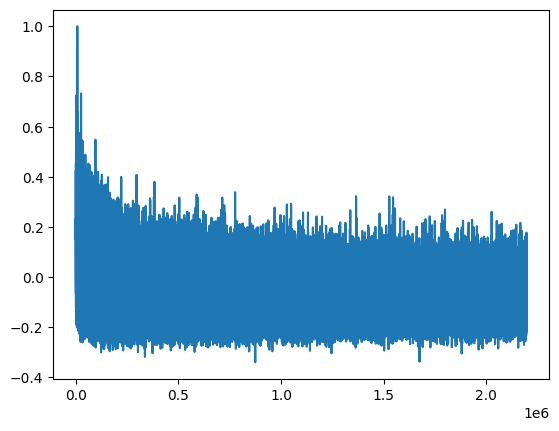

In [200]:
scores = nearest_neighbors(model, "queen")
sscores = [(score, n) for n, score in enumerate(scores)]
sortscores = sorted(sscores)
sortscores.reverse()
words = [idx2word[idx[1]] for idx in sortscores[:10]]
print(words)
plt.plot(scores)

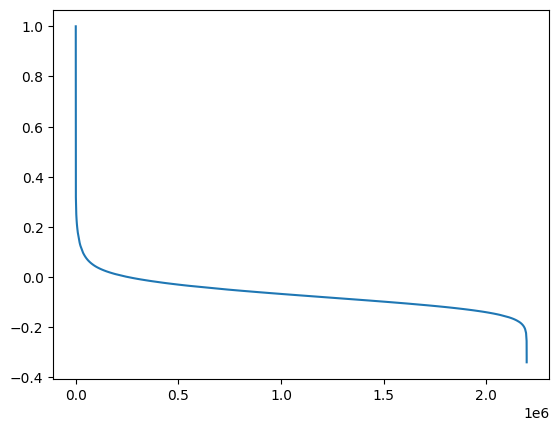

In [210]:
x = sorted(scores)
x.reverse()
plt.plot(x)

In [239]:
def find_analogies(model, w1, w2, w3):
    r = model[w1] - model[w2] + model[w3]
    return [np.mean(cosine_similarity(word[1].reshape(1,-1), r.reshape(1,-1))) for word in model.items()]

['king', 'queen', 'prince']


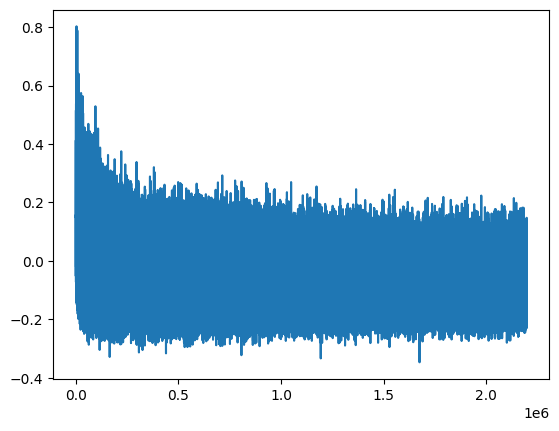

In [243]:
scores = find_analogies(model, 'king', 'man', 'woman')
sscores = [(score, n) for n, score in enumerate(scores)]
sortscores = sorted(sscores)
sortscores.reverse()
words = [idx2word[idx[1]] for idx in sortscores[:3]]
print(words)
plt.plot(scores)

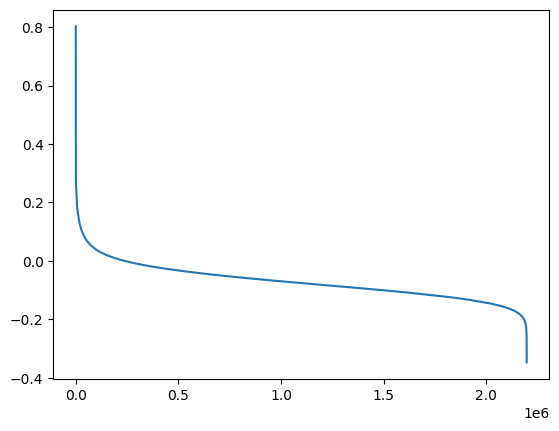

In [245]:
x = sorted(scores)
x.reverse()
plt.plot(x)

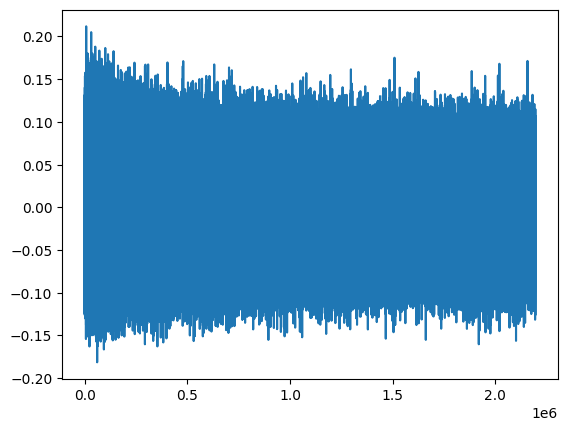

In [292]:
accuracy = np.array(nearest_neighbors(model, "queen")) - np.array(find_analogies(model, 'king', 'man', 'woman'))
plt.plot(accuracy) #should be close to 0